In [1]:
%load_ext autoreload
%autoreload 2

# Convolutional NN

In [2]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot

from si.data import Dataset
from si.util import to_categorical, summary

Load the MNIST dataset

In [3]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [4]:
train,test = load_mnist(500)

In [5]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.y = to_categorical(train.y)

In [6]:
preprocess(train)
preprocess(test)

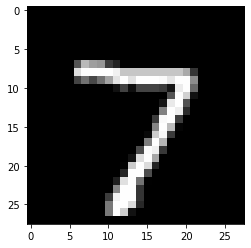

In [7]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [8]:
from si.supervised import NN, Dense, Activation, Conv2D, Flatten
from si.util.activation import Sigmoid, Tanh

Build the model

In [9]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28, 1), (3, 3), 1))
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [10]:
net.fit(train)

 epoch 1/2000 error = 0.4021539957421633
 epoch 2/2000 error = 0.38416885001944606
 epoch 3/2000 error = 0.3662050986327762
 epoch 4/2000 error = 0.34773284360286133
 epoch 5/2000 error = 0.3289190911474153
 epoch 6/2000 error = 0.31083918196911425
 epoch 7/2000 error = 0.2944946774185486
 epoch 8/2000 error = 0.2799689000509232
 epoch 9/2000 error = 0.2669593524138222
 epoch 10/2000 error = 0.25512251879756354
 epoch 11/2000 error = 0.24404725847573125
 epoch 12/2000 error = 0.23328124518870358
 epoch 13/2000 error = 0.22247009381775182
 epoch 14/2000 error = 0.21156874315962093
 epoch 15/2000 error = 0.20101904125233888
 epoch 16/2000 error = 0.19162948060901086
 epoch 17/2000 error = 0.18403314938871723
 epoch 18/2000 error = 0.17825279626158003
 epoch 19/2000 error = 0.17385936068832525
 epoch 20/2000 error = 0.17034720534106976
 epoch 21/2000 error = 0.16730981232163905
 epoch 22/2000 error = 0.16444461582031877
 epoch 23/2000 error = 0.1615095543024054
 epoch 24/2000 error = 0.15

In [11]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
conv = net.layers[0]

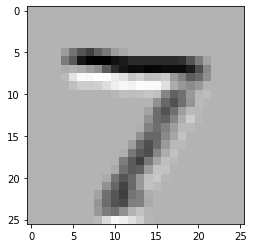

In [13]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))